# Real-time Weather Analysis for Wildlife Conservation in South African National Parks

This analysis leverages real-time weather data to provide valuable insights into the weather conditions of various South African national parks. Understanding these weather patterns can help conservationists to better protect and manage wildlife populations and their habitats.

## Objectives:

1. **Real-time data source**: Fetch real-time weather data for cities near South African national parks using the OpenWeather API.
2. **Data storage**: Store the fetched data in an SQLite database for efficient retrieval and tracking.
3. **Data Cleaning**: Implement a data cleaning process to handle NaN values, duplicates, and outliers in the dataset.
4. **Querying**: Extract average temperature and humidity for each national park from the database.
5. **Analysis**: Perform exploratory data analysis (EDA) on the cleaned data and generate visualizations of the average temperature and humidity. Extract insights.

## A. Data Collection
### 1. Real-time data source: Get real-time weather data from OpenWeather API


In [1]:
import requests
def get_weather_data(api_key, city):
    # Define the base URL for the API
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    
    # Define the parameters for the API request
    params = {
        "q": city,
        "appid": api_key
    }
    
    # Send a GET request to the API and return the response
    response = requests.get(base_url, params=params)
    return response.json()

## B. Data Storage and Management
### 2. Data storage: 

- **Create a connection to the SQLite database**

In [2]:
import sqlite3
def create_connection():
    conn = None
    try:
        # Create a connection to an SQLite database in memory
        conn = sqlite3.connect(':memory:')
        print(sqlite3.version)
    except Error as e:
        print(e)
    return conn

- **Create a table in the SQLite database**


In [3]:
def create_table(conn):
    try:
        # Define the SQL query to create a table
        sql = ''' CREATE TABLE WEATHER (
                                        id INTEGER PRIMARY KEY AUTOINCREMENT,
                                        park TEXT NOT NULL,
                                        temperature REAL,
                                        humidity REAL
                                    ); '''
        # Execute the SQL query
        c = conn.cursor()
        c.execute(sql)
    except Error as e:
        print(e)

- **Insert data into the SQLite database**


In [4]:
def insert_data(conn, data):
    # Define the SQL query to insert data into the table
    sql = ''' INSERT INTO WEATHER(park,temperature,humidity)
              VALUES(?,?,?) '''
    # Execute the SQL query
    cur = conn.cursor()
    cur.execute(sql, data)
    return cur.lastrowid

## C. Data Exploration and Cleaning
### 3. Querying: Query data from the SQLite database


In [5]:
import sqlite3
def query_data(conn):
    # Define the SQL query to fetch data from the table
    cur = conn.cursor()
    cur.execute("SELECT park, AVG(temperature), AVG(humidity) FROM WEATHER GROUP BY park")

    return cur.fetchall()

Data cleaning is a crucial step in the data science lifecycle. Unclean data can lead to inaccurate analysis and misleading results. In real-world scenarios, data is often messy and requires cleaning before it can be used for analysis. We need to ensure that our data is clean before we perform any analysis on it.

**Data Cleaning**


In [6]:
import pandas as pd
from scipy import stats
import numpy as np

def clean_data(data):
    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(data, columns=['Park', 'Temperature', 'Humidity'])

    # Check for missing values and handle them appropriately
    df = df.dropna()

    # Check for duplicate entries and remove them
    df = df.drop_duplicates()

    # Check for outliers in 'Temperature' and 'Humidity' and handle them appropriately
    df = df[(np.abs(stats.zscore(df[['Temperature', 'Humidity']])) < 3).all(axis=1)]

    return df

## D. Analysis and Model Development
### 4. Analysis: Analyze data and visualize your results


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_data(df):
    # Output the first few rows of the DataFrame
    print(df.head())
    
    # Print descriptive statistics of the DataFrame
    print(df.describe())
    
    # Set the overall aesthetic to "white" which doesn't have gridlines.
    sns.set(style="white")
    
    # Create a new figure with a specific aspect ratio
    plt.figure(figsize=(6, 6))
    
    # Generate a boxplot for 'Temperature' and 'Humidity' with a soft blue color
    sns.boxplot(data=df[['Temperature', 'Humidity']], palette=["#add8e6", "#add8e6"])
    
    # Set the title and labels for the boxplot
    plt.title('Boxplot of Temperature and Humidity', fontweight='bold')
    plt.xlabel('Variable', fontweight='bold', labelpad=10)
    plt.ylabel('Value', fontweight='bold', labelpad=10)
    
    # Display the boxplot
    plt.show()
    
    # Set the overall aesthetic to "white" which doesn't have gridlines.
    sns.set(style="white")
    
    # Create a pairplot with larger facets
    g = sns.pairplot(df, diag_kind="kde", markers="o",
                     plot_kws=dict(s=100, edgecolor="b", linewidth=1),
                     diag_kws=dict(fill=True),  # Updated line
                     height=2.5, aspect=1.2)
    
    # Display the pairplot
    plt.show()

    
    # Calculate the correlation between 'Temperature' and 'Humidity' and generate a heatmap
    corr = df[['Temperature', 'Humidity']].corr()
    sns.heatmap(corr, annot=True)
    plt.show()
    
    # Prepare data for bar plots
    parks = df['Park'].tolist()
    temperatures = df['Temperature'].tolist()
    humidities = df['Humidity'].tolist()
    
    # Shorten park names for the plot
    park_names_for_plot = [park.split()[0] for park in parks]
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(2, 1, figsize=(10,10))
    
    # Plot average temperature
    axs[0].bar(park_names_for_plot, temperatures, color='steelblue')
    axs[0].set_title('Average Temperature', fontweight='bold')
    axs[0].set_xlabel('Park', fontweight='bold', labelpad=10)
    axs[0].set_ylabel('Temperature (°C)', fontweight='bold', labelpad=10)
    
    # Plot average humidity
    axs[1].bar(park_names_for_plot, humidities, color='firebrick')
    axs[1].set_title('Average Humidity', fontweight='bold')
    axs[1].set_xlabel('Park', fontweight='bold', labelpad=10)
    axs[1].set_ylabel('Humidity (%)', fontweight='bold', labelpad=10)
    
    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

### Main function to orchestrate the data collection, storage, querying, cleaning, and analysis


2.6.0
                           Park  Temperature  Humidity
0   Addo Elephant National Park        18.51      80.0
1    Garden Route National Park        15.75      77.0
2          Kruger National Park        21.16      68.0
3        Marakele National Park        27.07      35.0
4  Table Mountain National Park        19.22      56.0
       Temperature   Humidity
count     5.000000   5.000000
mean     20.342000  63.200000
std       4.231923  18.322118
min      15.750000  35.000000
25%      18.510000  56.000000
50%      19.220000  68.000000
75%      21.160000  77.000000
max      27.070000  80.000000


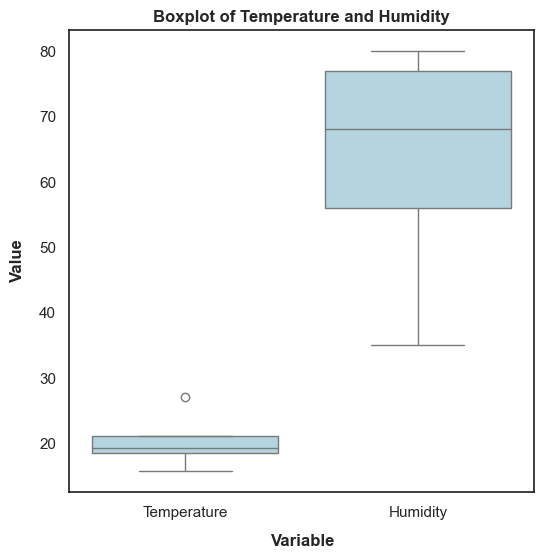

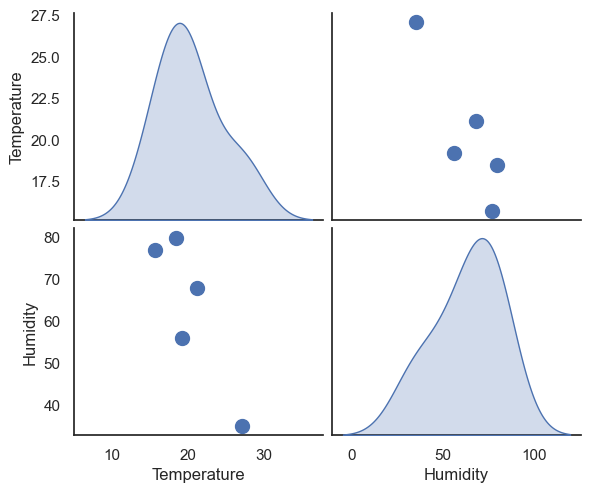

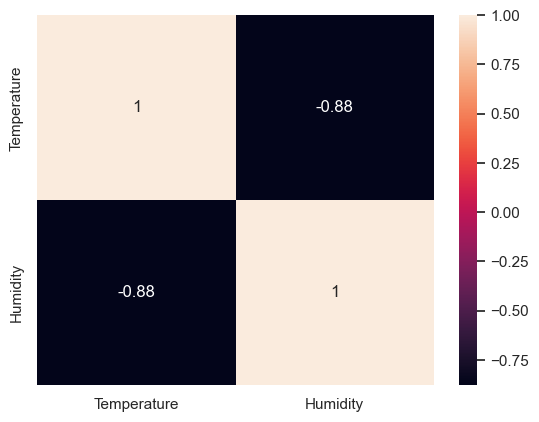

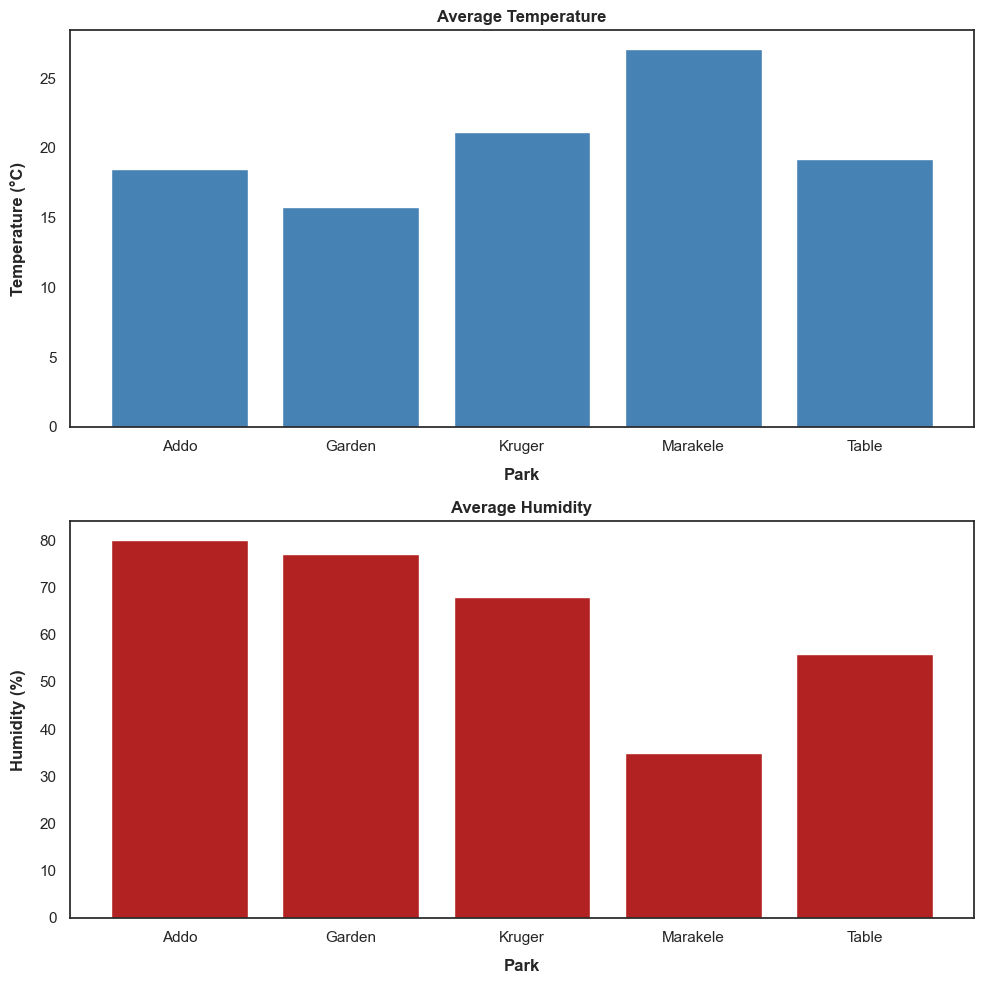

In [8]:
def main():
    # Define the API key and the mapping of parks to cities
    api_key = "ENTER_YOUR_API_KEY"
    parks_and_cities = {
        "Kruger National Park": "Nelspruit",
        "Addo Elephant National Park": "Port Elizabeth",
        "Table Mountain National Park": "Cape Town",
        "Garden Route National Park": "George",
        "Marakele National Park": "Thabazimbi"
    }

    # Create a connection to the SQLite database
    conn = create_connection()

    # If the connection was successful, proceed with the rest of the process
    if conn is not None:
        # Create a table in the SQLite database
        create_table(conn)
        
        # Fetch weather data for each city and insert it into the SQLite database
        for park, city in parks_and_cities.items():
            weather_data = get_weather_data(api_key, city)
            if weather_data is not None and 'main' in weather_data:
                # Convert temperature from Kelvin to Celsius
                temperature = weather_data['main']['temp'] - 273.15
                humidity = weather_data['main']['humidity']
                data = (park, temperature, humidity)
                insert_data(conn, data)
        
        # Query data from the SQLite database
        data = query_data(conn)
        
        # Clean the data
        data = clean_data(data)
        
        # Analyze the data
        analyze_data(data)
    else:
        print("Error! Cannot create the database connection.")

# Run the main function
if __name__ == "__main__":
    main()


# Author:
*Vitalis K. Lagat, PhD*